# Data Exploration and Preparation

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-01-19 20:47:16.372082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 20:47:16.396318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 20:47:16.402421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-19 20:47:16.420317: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Inspection of the dataset

In [3]:
print('train set dimensions ', train_images.shape)
print('train set labels', train_labels)
print('-------------------')
print('test set dimensions',test_images.shape)

train set dimensions  (60000, 28, 28)
train set labels [5 0 4 ... 5 6 8]
-------------------
test set dimensions (10000, 28, 28)


In [4]:
print ('Unique classes in the MNIST train set', np. unique(train_labels))
print ('Frequency of unique classes in MNIST train set', np. unique(train_labels, return_counts=True))

Unique classes in the MNIST train set [0 1 2 3 4 5 6 7 8 9]
Frequency of unique classes in MNIST train set (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [5]:
print ('Unique classes in the MNIST test set', np. unique(test_labels))
print ('Frequency of unique classes in MNIST test set', np. unique(test_labels, return_counts=True))

Unique classes in the MNIST test set [0 1 2 3 4 5 6 7 8 9]
Frequency of unique classes in MNIST test set (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))


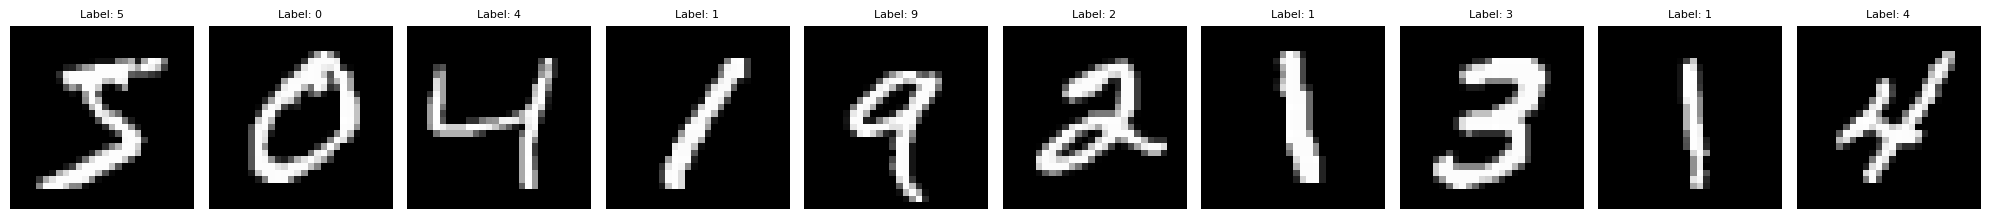

In [6]:
plt.figure(figsize=(20, 4))

# Loop through the first 10 images to get an idea of the dataset
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off') 
    plt.title(f"Label: {train_labels[i]}", fontsize=8)

plt.tight_layout()
plt.show()

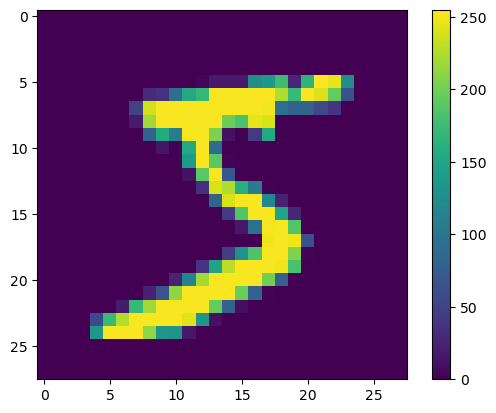

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Data preprocessing

In [8]:
def preprocess_data(train_images, test_images):
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    train_images = np.expand_dims(train_images, axis=-1)
    test_images = np.expand_dims(test_images, axis=-1)
    return train_images, test_images

In [9]:
train_images, test_images = preprocess_data(train_images, test_images)

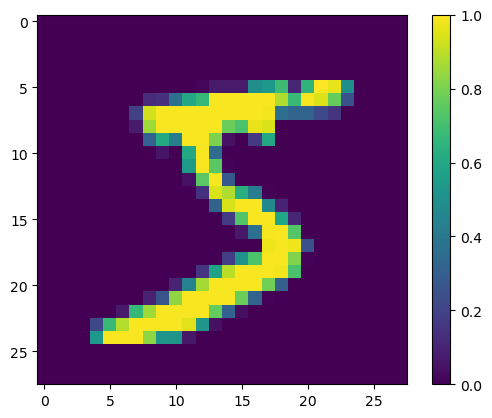

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# A simple CNN, trained with the original data

In [11]:
model = Sequential([
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8804 - loss: 0.4226
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9634 - loss: 0.1228
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9766 - loss: 0.0772
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9813 - loss: 0.0627
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9869 - loss: 0.0447
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9893 - loss: 0.0332
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9926 - loss: 0.0250
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9936 - loss: 0.0224
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9942 - loss: 0.0187
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9962 - loss: 0.0132


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0968
Test accuracy: 0.9768999814987183


# Dataset augmentation

In [15]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False, #because of 6 and 9
    fill_mode='nearest'
)

datagen.fit(train_images)

### Explore some of the augmented images

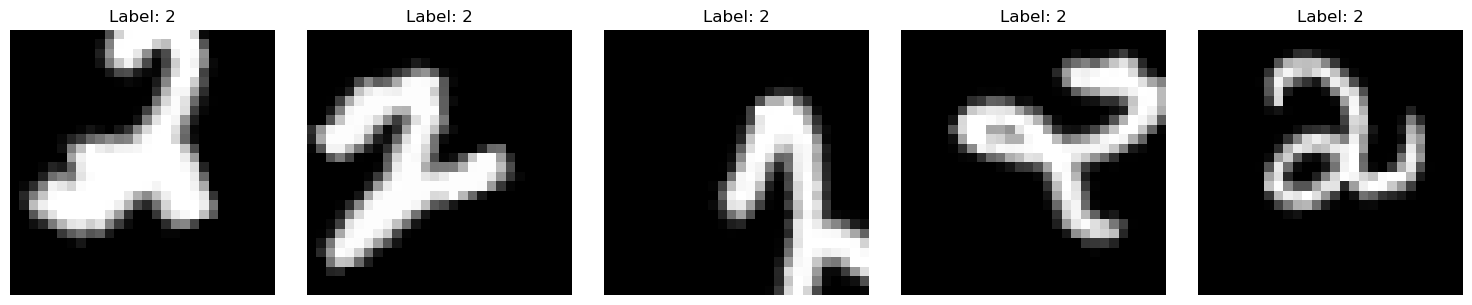

In [16]:
# Filter the images to get only those with label '2' for better understanding and comparison
label_of_interest = 2
filtered_images = train_images[train_labels == label_of_interest]
filtered_labels = train_labels[train_labels == label_of_interest]

augmented_images = datagen.flow(filtered_images, batch_size=5)
images = next(augmented_images) 

# Plot 5 augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 1 row, 5 images
axes = axes.flatten()

for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].axis('off') 
    axes[i].set_title(f"Label: {label_of_interest}")

plt.tight_layout()
plt.show()

# Simple CNN with augmented dataset

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Train the model using the augmented data generator
model.fit(datagen.flow(train_images, train_labels, batch_size=32), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.6399 - loss: 1.1305
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.7456 - loss: 0.8298
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.7830 - loss: 0.6953
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.8088 - loss: 0.6210
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8225 - loss: 0.5732
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8357 - loss: 0.5396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8414 - loss: 0.5202
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.8482 - loss: 0.5012
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8566 - loss: 0.4772
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8574 - loss: 0.4629


In [20]:
# Evaluate the model on the test set
augmented_test_loss, augmented_test_acc = model.evaluate(test_images, test_labels)
print('Augmented test accuracy:', augmented_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9229 - loss: 0.2424
Augmented test accuracy: 0.932200014591217


In [21]:
# Compare the model accuracy on the original set vs the augmented set
print('Simple test accuracy:', test_acc)
print('Simple augmented test accuracy:', augmented_test_acc)

Simple test accuracy: 0.9768999814987183
Simple augmented test accuracy: 0.932200014591217


# More advanced CNN with augmented dataset

In [22]:
# more layers are added
def build_advanced_model():
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [23]:
advanced_model = build_advanced_model()

In [24]:
advanced_model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          validation_data=(test_images, test_labels),
          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 251s 133ms/step - accuracy: 0.5385 - loss: 1.3305 - val_accuracy: 0.9559 - val_loss: 0.1485
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 246s 131ms/step - accuracy: 0.8474 - loss: 0.4887 - val_accuracy: 0.9647 - val_loss: 0.1102
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 241s 129ms/step - accuracy: 0.8866 - loss: 0.3713 - val_accuracy: 0.9685 - val_loss: 0.0905
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 241s 128ms/step - accuracy: 0.9064 - loss: 0.3077 - val_accuracy: 0.9735 - val_loss: 0.0727
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 245s 130ms/step - accuracy: 0.9166 - loss: 0.2790 - val_accuracy: 0.9762 - val_loss: 0.0756
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 243s 129ms/step - accuracy: 0.9195 - loss: 0.2690 - val_accuracy: 0.9792 - val_loss: 0.0639
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 245s 130ms/step - accuracy: 0.9270 - loss: 0.2395 - val_accuracy: 0.9804 - val_loss: 0.0569
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 240s 128ms/step - ac

In [25]:
advanced_test_loss, advanced_test_acc = advanced_model.evaluate(test_images, test_labels)
print('Simple test accuracy:', test_acc)
print('Simple augmented test accuracy:', augmented_test_acc)
print('Advanced test accuracy:', advanced_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9814 - loss: 0.0564
Simple test accuracy: 0.9768999814987183
Simple augmented test accuracy: 0.932200014591217
Advanced test accuracy: 0.982699990272522


In [26]:
# Export functions to make them importable
if __name__ == "__main__":
    pass  # Prevent unintended execution during import